In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_012_health_indicators_BRFSS2021.csv')

X = df.drop("Diabetes_012", axis=1)
y = df["Diabetes_012"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8399822319993231


Accuracy: 0.8389880700566884


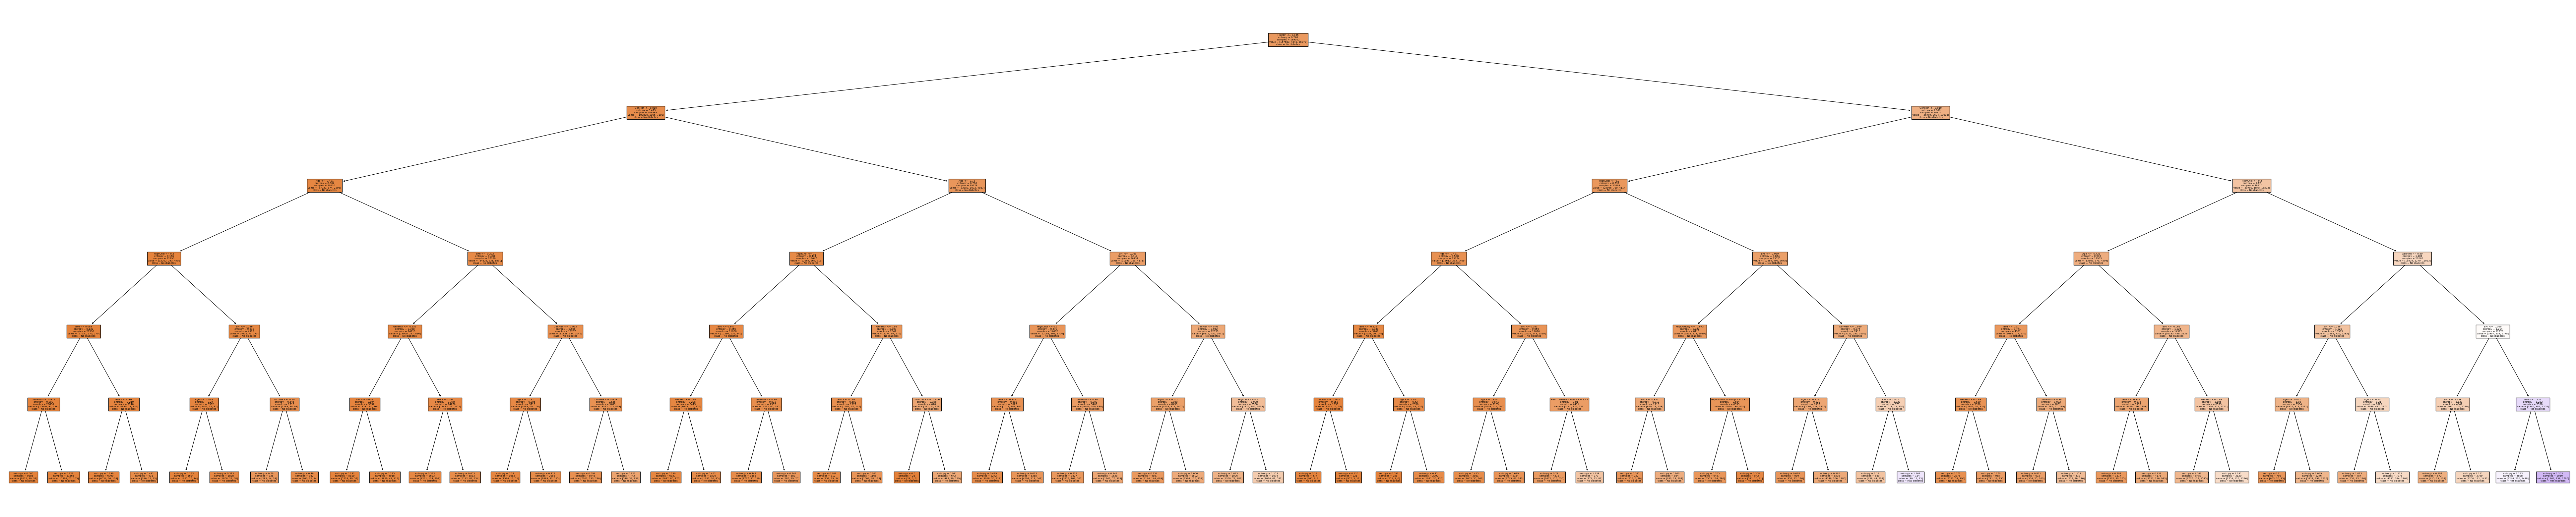

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model2 = DecisionTreeClassifier(random_state=123, criterion="entropy", max_depth=6)
model2.fit(X_train,y_train)
y_pread=model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pread)
print("Accuracy:", accuracy)

feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
                 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
                 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

class_names = ['No diabetes', 'Pre-diabetes', 'Has diabetes']

plt.figure(figsize=(100, 20))
plot_tree(model2, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

Accuracy: 0.8219180979778323


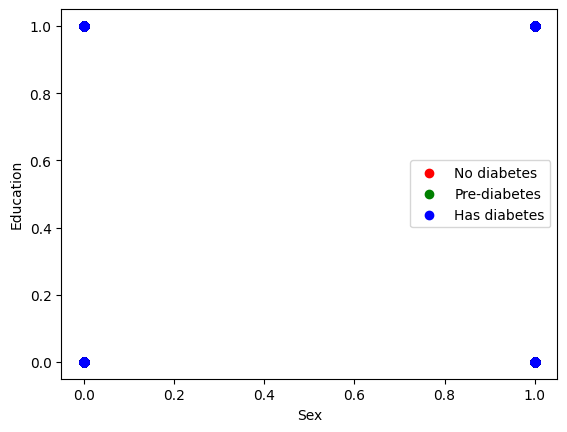

In [52]:
from sklearn.neighbors import KNeighborsClassifier as kNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=kNeighborsClassifier()
knn.fit(X_train,y_train)
knntd=knn.predict(X_test)
knnaccuracy = accuracy_score(y_test, knntd)
print("Accuracy:", knnaccuracy)

# Assume that 'scaler' is your StandardScaler object and 'X_test_scaled' is your scaled test data
X_test_original = scaler.inverse_transform(X_test)

feature_1 = X_test_original[:, 0]
feature_2 = X_test_original[:, 1]

colors = ['red', 'green', 'blue'] 

for i in range(len(colors)):
    xs = feature_1[y_test == i]
    ys = feature_2[y_test == i]
    plt.scatter(xs, ys, c=colors[i])

plt.legend(['No diabetes', 'Pre-diabetes', 'Has diabetes'])
plt.xlabel('Sex')
plt.ylabel('Education')

plt.show()

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7512056857602166


In [4]:
from sklearn.ensemble import RandomForestClassifier as randomForestClassifier
from sklearn.metrics import accuracy_score
rfc=randomForestClassifier()
rfc.fit(X_train,y_train)
rfctd=rfc.predict(X_test)
rfcaccuracy = accuracy_score(y_test, rfctd)
rfcaccuracy

0.8332980793637363